# Steps in Web Scraping

We use requests package to connect to the desired web page

We will use beautiful soup library to pass the data from the web page and store them in list or dict

Analysing the html tags form our specific fields

Store the data in csv or xlsx files

# HTTP response status codes

HTTP response status codes indicate whether a specific HTTP request has bee successfully completed.
Response are grouped in five classes:

1. informational responses(100-199)
2. Successful responses(200-299)
3. Redirection messages(300-399)
4. Client error responses(400-499)
5. Server error responses(500-599)

In [1]:
#pip install requests

In [2]:
#pip install bs4 

In [3]:
import requests

In [4]:
import bs4

In [5]:
url="https://www.makaan.com/hyderabad-residential-property/buy-property-in-hyderabad-city"

In [6]:
data=requests.get(url)
data

<Response [200]>

In [7]:
type(data.text)

str

In [8]:
from bs4 import BeautifulSoup

In [9]:
soup=BeautifulSoup(data.text,"html")

# Print Information Line by Line

In [10]:
soup.find('div',attrs={"class":"title-line"}).text #tag is div so give that in str and attrs(attribute)convert in to dict.

'3 BHK Apartment in Kalyan Skyway 9'

In [11]:
soup.find('span',attrs={"itemprop":"addressLocality"}).text

'Manchirevula'

In [12]:
soup.find('div',attrs={"data-type":"price-link"}).text

' 1.46 Cr'

In [13]:
soup.find('td',attrs={"class":"lbl rate"}).text

'6,800 / sq ft'

In [14]:
soup.find('td',attrs={"class":"size"}).text

'2150 '

In [15]:
soup.find('td',attrs={"class":"val"}).text

'Ready to move'

# Print the information at a time

In [16]:
prop=soup.find_all('div',attrs={"class":"title-line"})

In [17]:
prop_name=[]
for i in prop:
    prop_name.append(i.text)

In [18]:
Apartment=[i.text for i in prop]
print(Apartment)
print("Length : ",len(Apartment))

['3 BHK Apartment in Kalyan Skyway 9', '2 BHK Apartment in MKT Urban Tree', '2 BHK Apartment in Sumadhura Gardens By The Brook', '2 BHK Apartment in Maram Mihira', '3 BHK Apartment in Gk Zenith', '3 BHK Apartment in Anuhar Gautami Heights', '3 BHK Apartment in Vasavi Nandanam', '3 BHK Apartment in Divine Space', '2 BHK Apartment in Vasavi Construction Metropolis', '4 BHK Villa in Cloudswood RADHEY RAAGA', '3 BHK Apartment in Vision Visions Arsha', '4 BHK Apartment in RAGHURAM PRADEEP CONSTRUCTIONS The Vue Residences', '2 BHK Apartment in Akruthi Srivatsa', '3 BHK Apartment in Pranathi Kiara', '2 BHK Apartment in Janapriya Nile Valley', '4 BHK Apartment in Trishala Trilok', '3 BHK Apartment in Aakriti Cyan', '3 BHK Apartment in ARR Avencia', '3 BHK Apartment in Makuta Projects My Space 2', '3 BHK Apartment in Adhireddy Pavan Kumar Reddy Cozy Essence Elite']
Length :  20


In [19]:
b=soup.find_all('span',attrs={"itemprop":"addressLocality"})
Location=[i.text for i in b]
print(Location)
print("Length : ",len(b))

['Manchirevula', 'Isnapur', 'Shamshabad', 'Pocharam', 'Yapral', 'Miyapur', 'Jeedimetla', 'Tellapur', 'Uppal Kalan', 'Patighanpur', 'Tellapur', 'Puppalaguda', 'Mallampet', 'Tellapur', 'Madeenaguda', 'Shamshabad', 'Tellapur', 'Bachupally', 'Bachupally', 'Kompally']
Length :  20


In [20]:
c=soup.find_all('div',attrs={"data-type":"price-link"})
Price=[i.text for i in c]
print(Price)
print("Length : ",len(c))

[' 1.46 Cr', ' 48.04 L', ' 1.27 Cr', ' 62.93 L', ' 1.04 Cr', ' 1.37 Cr', ' 1.22 Cr', ' 1.04 Cr', ' 67.08 L', ' 6.89 Cr', ' 1.45 Cr', ' 4.04 Cr', ' 61 L', ' 1.23 Cr', ' 63.36 L', ' 2.69 Cr', ' 1.17 Cr', ' 93 L', ' 1.26 Cr', ' 90.22 L']
Length :  20


In [21]:
d=soup.find_all('td',attrs={"class":"lbl rate"})
Sqrt=[i.text for i in d]
print(Sqrt)
print("Length: ",len(d))

['6,800 / sq ft', '4,200 / sq ft', '8,022 / sq ft', '5,055 / sq ft', '6,000 / sq ft', '7,000 / sq ft', '6,073 / sq ft', '6,899 / sq ft', '6,304 / sq ft', '14,999 / sq ft', '7,299 / sq ft', '10,891 / sq ft', '5,000 / sq ft', '6,299 / sq ft', '6,400 / sq ft', '6,500 / sq ft', '6,499 / sq ft', '6,000 / sq ft', '6,502 / sq ft', '4,500 / sq ft']
Length:  20


In [22]:
e=soup.find_all('td',attrs={"class":"size"})
Areasqrt=[i.text for i in e]
print(Areasqrt)
print("Lenght : ",len(e))

['2150 ', '1144 ', '1590 ', '1245 ', '1735 ', '1968 ', '2010 ', '1510 ', '1065 ', '4596 ', '2000 ', '3715 ', '1220 ', '1965 ', '990 ', '4150 ', '1813 ', '1550 ', '1946 ', '2005 ']
Lenght :  20


In [23]:
f=soup.find_all('td',attrs={"class":"val"})
Status=[i.text for i in f]
print(Status)
print("Lenght : ",len(f))

['Ready to move', 'Ready to move', 'Under Construction', 'Under Construction', 'Ready to move', 'Under Construction', 'Under Construction', 'Under Construction', 'Under Construction', 'Under Construction', 'Under Construction', 'Under Construction', 'Under Construction', 'Under Construction', 'Under Construction', 'Under Construction', 'Under Construction', 'Ready to move', 'Under Construction', 'Ready to move']
Lenght :  20


In [24]:
import pandas as pd

In [25]:
data=pd.DataFrame({'Apartment':Apartment,'Location':Location,'Price':Price,'Sqrt':Sqrt,'Areasqrt':Areasqrt,'Status':Status})
data

,Apartment,Location,Price,Sqrt,Areasqrt,Status
0,3 BHK Apartment in Kalyan Skyway 9,Manchirevula,1.46 Cr,"6,800 / sq ft",2150,Ready to move
1,2 BHK Apartment in MKT Urban Tree,Isnapur,48.04 L,"4,200 / sq ft",1144,Ready to move
2,2 BHK Apartment in Sumadhura Gardens By The Brook,Shamshabad,1.27 Cr,"8,022 / sq ft",1590,Under Construction
3,2 BHK Apartment in Maram Mihira,Pocharam,62.93 L,"5,055 / sq ft",1245,Under Construction
4,3 BHK Apartment in Gk Zenith,Yapral,1.04 Cr,"6,000 / sq ft",1735,Ready to move
5,3 BHK Apartment in Anuhar Gautami Heights,Miyapur,1.37 Cr,"7,000 / sq ft",1968,Under Construction
6,3 BHK Apartment in Vasavi Nandanam,Jeedimetla,1.22 Cr,"6,073 / sq ft",2010,Under Construction
7,3 BHK Apartment in Divine Space,Tellapur,1.04 Cr,"6,899 / sq ft",1510,Under Construction
8,2 BHK Apartment in Vasavi Construction Metropolis,Uppal Kalan,67.08 L,"6,304 / sq ft",1065,Under Construction
9,4 BHK Villa in Cloudswood RADHEY RAAGA,Patighanpur,6.89 Cr,"14,999 / sq ft",4596,Under Construction


# Store the scraped data as csv or xlsx files

In [26]:
data.to_csv("Hyd_apartments.csv")

# Create links

In [27]:
base_url="https://www.makaan.com/hyderabad-residential-property/buy-property-in-hyderabad-city?page="
for i in range(21):
    print(base_url+str(i))

https://www.makaan.com/hyderabad-residential-property/buy-property-in-hyderabad-city?page=0
https://www.makaan.com/hyderabad-residential-property/buy-property-in-hyderabad-city?page=1
https://www.makaan.com/hyderabad-residential-property/buy-property-in-hyderabad-city?page=2
https://www.makaan.com/hyderabad-residential-property/buy-property-in-hyderabad-city?page=3
https://www.makaan.com/hyderabad-residential-property/buy-property-in-hyderabad-city?page=4
https://www.makaan.com/hyderabad-residential-property/buy-property-in-hyderabad-city?page=5
https://www.makaan.com/hyderabad-residential-property/buy-property-in-hyderabad-city?page=6
https://www.makaan.com/hyderabad-residential-property/buy-property-in-hyderabad-city?page=7
https://www.makaan.com/hyderabad-residential-property/buy-property-in-hyderabad-city?page=8
https://www.makaan.com/hyderabad-residential-property/buy-property-in-hyderabad-city?page=9
https://www.makaan.com/hyderabad-residential-property/buy-property-in-hyderabad-

In [28]:
import matplotlib.pyplot as plt

# Bar

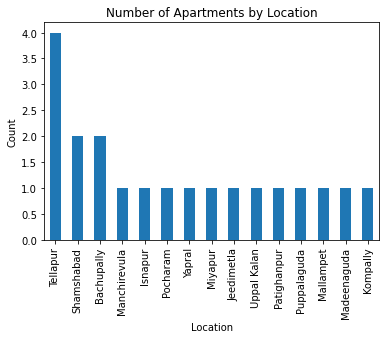

In [35]:
data["Location"].value_counts().plot(kind="bar")
plt.title("Number of Apartments by Location")
plt.xlabel("Location")
plt.ylabel("Count")
plt.show()


# Pie

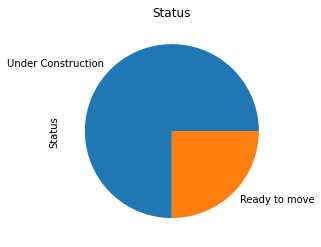

In [33]:
data["Status"].value_counts().plot(kind="pie")
plt.title("Status")
plt.show()

# Line

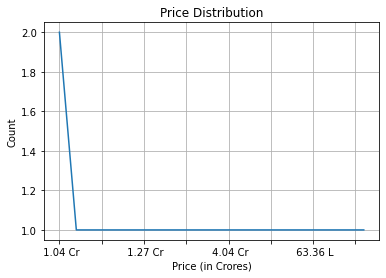

In [37]:
data["Price"].value_counts().sort_index().plot(kind="line")
plt.title("Price Distribution")
plt.xlabel("Price (in Crores)")
plt.ylabel("Count")
plt.show()